In [14]:
import pandas as pd
df = pd.read_csv('ju24qv0200.csv', encoding='utf-8')

/var/folders/2l/hbn5x8pj6pl69ys8kvyys4bm0000gn/T/ipykernel_16285/2015740315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ku_monthly_population[col] = pd.to_numeric(
/var/folders/2l/hbn5x8pj6pl69ys8kvyys4bm0000gn/T/ipykernel_16285/2015740315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ku_monthly_population[col] = pd.to_numeric(
/var/folders/2l/hbn5x8pj6pl69ys8kvyys4bm0000gn/T/ipykernel_16285/2015740315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

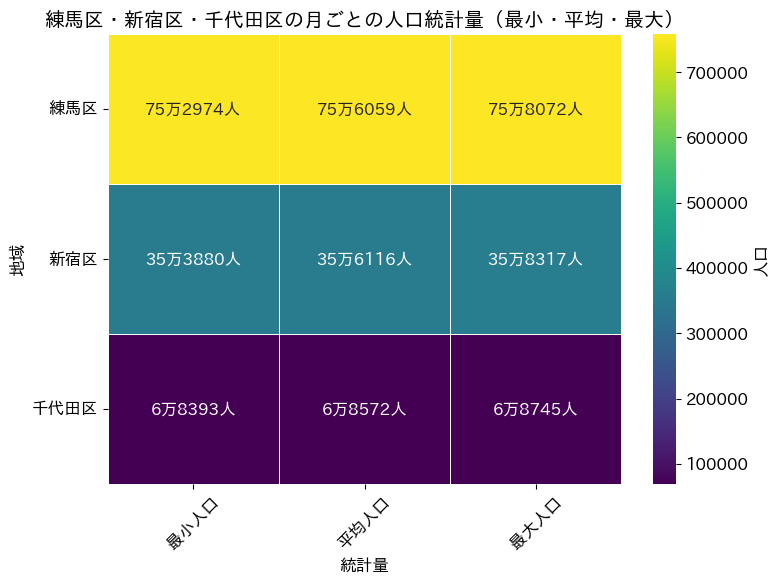

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# --- 前提: ku_monthly_population データフレームが準備されていること ---
# df = pd.read_csv('ju24qv0200.csv', encoding='utf-8')
# ku_data_all = df[~df["地域"].isna() & df["地域"].str.endswith("区")].copy()
# month_columns = [f"{i}月" for i in range(1, 13)]
# ku_monthly_population = ku_data_all[["地域"] + month_columns]

for col in month_columns:
    if col in ku_monthly_population.columns:
        ku_monthly_population[col] = pd.to_numeric(
            ku_monthly_population[col].astype(str).str.replace(',', ''),
            errors='coerce'
        )
ku_monthly_population.fillna(0, inplace=True)

# --- フォント設定 ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# --- 各区の月ごとの平均人口、最大人口、最小人口を計算 ---
ku_population_stats = pd.DataFrame()
ku_population_stats["平均人口"] = ku_monthly_population[month_columns].mean(axis=1)
ku_population_stats["最大人口"] = ku_monthly_population[month_columns].max(axis=1)
ku_population_stats["最小人口"] = ku_monthly_population[month_columns].min(axis=1)
ku_population_stats["地域"] = ku_monthly_population["地域"]
ku_population_stats = ku_population_stats.set_index("地域")

# 比較対象の区のリスト
compare_ku_names = ["練馬区", "新宿区", "千代田区"]

# ヒートマップの対象を特定の区に限定
filtered_ku_population_stats = ku_population_stats.loc[compare_ku_names]

# 列の順序を「最小人口」→「平均人口」→「最大人口」に並び替える
desired_order = ["最小人口", "平均人口", "最大人口"]
filtered_ku_population_stats_ordered = filtered_ku_population_stats[desired_order]

# --- ここから修正部分: 数値を「○○万○○○○人」形式の文字列に変換する ---
# ヒートマップのannotに渡すための新しいDataFrameを作成
annot_data = filtered_ku_population_stats_ordered.applymap(
    lambda x: f"{int(x / 10000)}万{int(x % 10000)}人"
)
# print("アノテーション用DataFrame:")
# print(annot_data) # 確認用

# --- ヒートマップで可視化（並び替えたDataFrameと加工したアノテーションを使用） ---
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_ku_population_stats_ordered, # 数値データはそのまま渡す（色の濃淡用）
            annot=annot_data,                     # 加工した文字列データは annot に渡す
            fmt="",                               # fmt を空文字列にする（annot_dataが文字列なので）
            cmap="viridis",
            linewidths=.5,
            cbar_kws={'label': '人口'})

plt.title("練馬区・新宿区・千代田区の月ごとの人口統計量（最小・平均・最大）")
plt.xlabel("統計量")
plt.ylabel("地域")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

人口データ読み込み成功

--- 選択された区の月ごとの人口データ (整形後) ---
      地域      1月      2月      3月      4月      5月      6月      7月      8月  \
6   千代田区   68393   68436   68489   68494   68745   68663   68640   68667   
9    新宿区  354032  354190  353880  354124  356631  356515  356352  357171   
25   練馬区  753257  753092  752974  755145  756795  757101  756795  757134   

        9月     10月     11月     12月  令和7年1月  
6    68653   68619   68537   68530   68473  
9   356619  357434  358317  358135  357523  
25  757072  757524  758072  757756  757644  


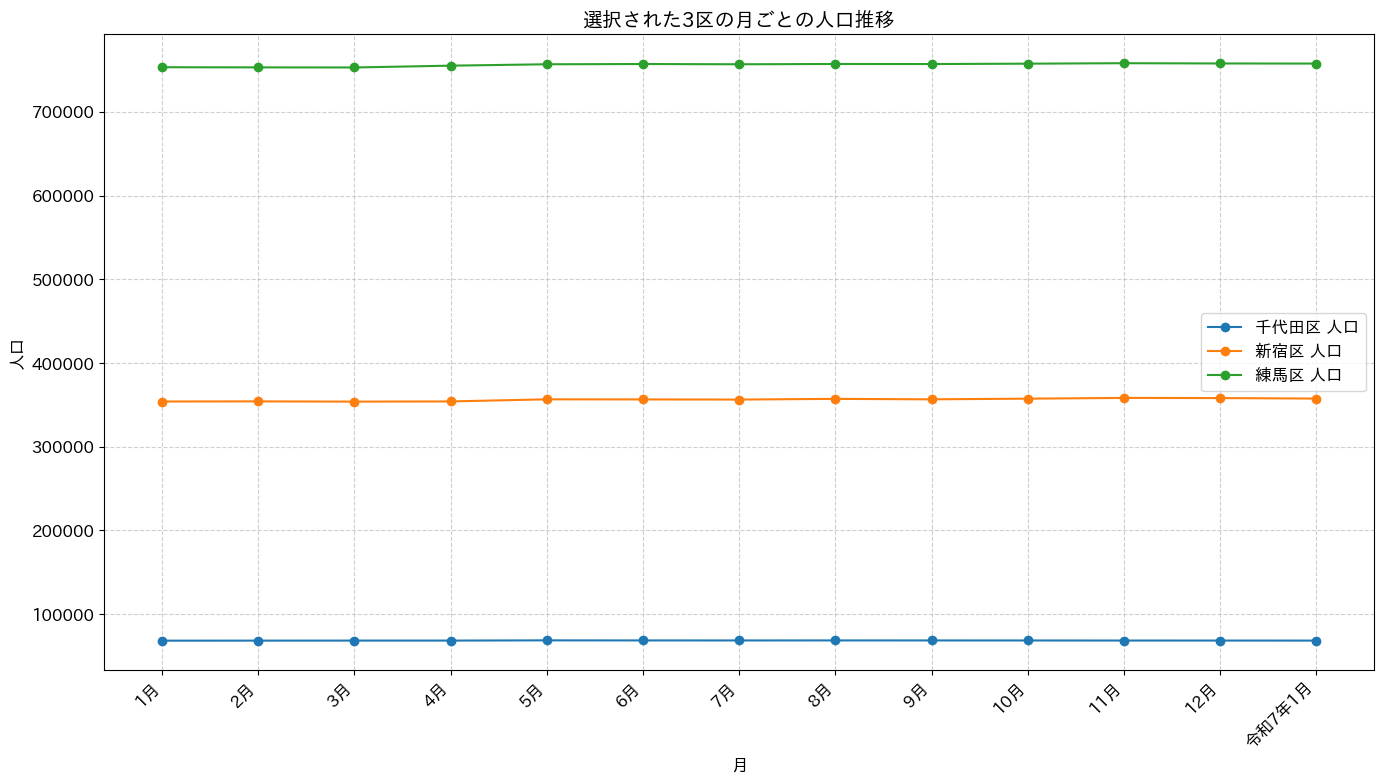

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# --- フォント設定 (必要に応じて再実行) ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み ---
population_csv_filename = 'ju24qv0200.csv'

try:
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
    print("人口データ読み込み成功")
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

# カラム名から不要な空白などを除去
ku_population_all.columns = ku_population_all.columns.str.strip()

# 今回は「練馬区」「千代田区」「新宿区」の3区の人口データを使用
target_wards = ['練馬区', '千代田区', '新宿区']

# 区名が入っているカラム名
ward_column_name = '地域'

# 月ごとの人口カラムをリストアップ
# 1月～12月、令和7年1月も含む
monthly_columns = [f'{i}月' for i in range(1, 13)] + ['令和7年1月']

# 対象の区の行を抽出
population_data_monthly = ku_population_all[ku_population_all[ward_column_name].isin(target_wards)].copy()

# 必要なカラム（地域と月ごとの人口）のみを抽出
population_data_monthly = population_data_monthly[[ward_column_name] + monthly_columns]

# 月ごとの人口データを数値型に変換し、NaNを0で埋める
for col in monthly_columns:
    population_data_monthly[col] = pd.to_numeric(population_data_monthly[col], errors='coerce').fillna(0).astype(int)

print("\n--- 選択された区の月ごとの人口データ (整形後) ---")
print(population_data_monthly)

# --- 月ごとの人口推移を可視化 ---

plt.figure(figsize=(14, 8))

for index, row in population_data_monthly.iterrows():
    ward_name = row[ward_column_name]
    # 月ごとの人口データを抽出（地域カラムを除く）
    monthly_populations = row[monthly_columns]
    
    # 折れ線グラフでプロット
    plt.plot(monthly_populations.index, monthly_populations.values, marker='o', label=f'{ward_name} 人口')

plt.xlabel('月')
plt.ylabel('人口')
plt.title('選択された3区の月ごとの人口推移')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right') # 月名が重ならないように回転
plt.tight_layout()
plt.show()

人口データ読み込み成功

--- 選択された区の月ごとの人口データ (整形後) ---
      地域      1月      2月      3月      4月      5月      6月      7月      8月  \
6   千代田区   68393   68436   68489   68494   68745   68663   68640   68667   
9    新宿区  354032  354190  353880  354124  356631  356515  356352  357171   
25   練馬区  753257  753092  752974  755145  756795  757101  756795  757134   

        9月     10月     11月     12月  令和7年1月  
6    68653   68619   68537   68530   68473  
9   356619  357434  358317  358135  357523  
25  757072  757524  758072  757756  757644  

--- 選択された区の月ごとの人口増減 ---
     地域   2月   3月    4月    5月   6月   7月   8月   9月  10月  11月  12月  令和7年1月
0  千代田区   43   53     5   251  -82  -23   27  -14  -34  -82   -7     -57
1   新宿区  158 -310   244  2507 -116 -163  819 -552  815  883 -182    -612
2   練馬区 -165 -118  2171  1650  306 -306  339  -62  452  548 -316    -112


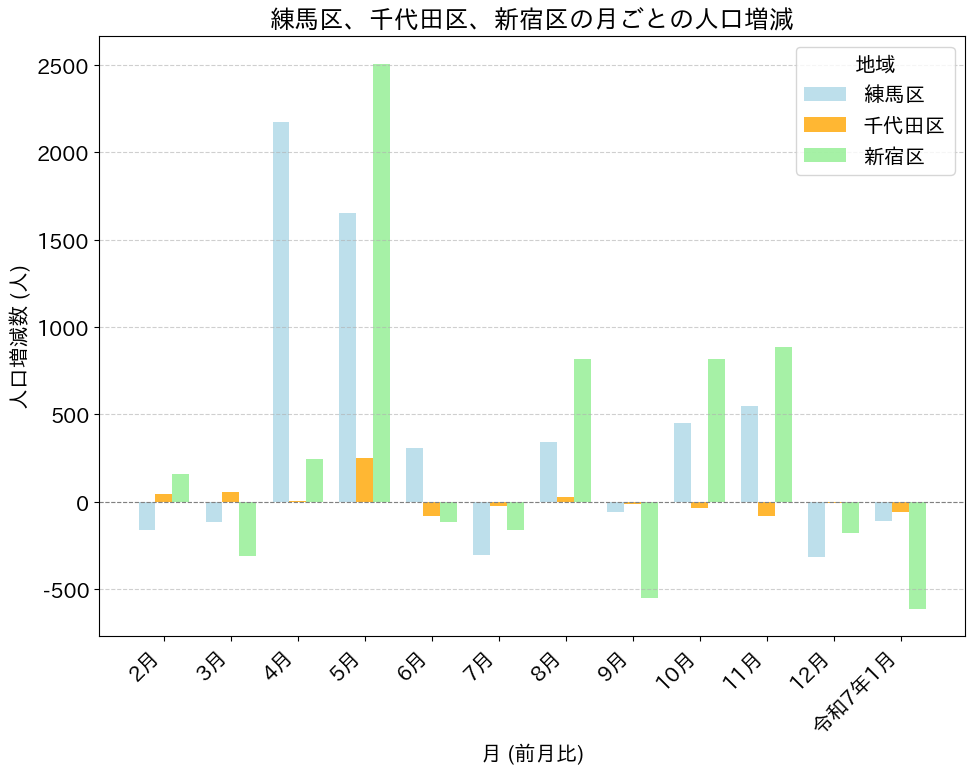

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# --- フォント設定 (必要に応じて再実行) ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み ---
population_csv_filename = 'ju24qv0200.csv'

try:
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
    print("人口データ読み込み成功")
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

# カラム名から不要な空白などを除去
ku_population_all.columns = ku_population_all.columns.str.strip()

# 今回は「練馬区」「千代田区」「新宿区」の3区の人口データを使用
target_wards = ['練馬区', '千代田区', '新宿区']

# 区名が入っているカラム名
ward_column_name = '地域'

# 月ごとの人口カラムをリストアップ
# 1月～12月、令和7年1月も含む
monthly_columns = [f'{i}月' for i in range(1, 13)] + ['令和7年1月']

# 対象の区の行を抽出
population_data_monthly = ku_population_all[ku_population_all[ward_column_name].isin(target_wards)].copy()

# 必要なカラム（地域と月ごとの人口）のみを抽出
population_data_monthly = population_data_monthly[[ward_column_name] + monthly_columns]

# 月ごとの人口データを数値型に変換し、NaNを0で埋める
for col in monthly_columns:
    population_data_monthly[col] = pd.to_numeric(population_data_monthly[col], errors='coerce').fillna(0).astype(int)

print("\n--- 選択された区の月ごとの人口データ (整形後) ---")
print(population_data_monthly)

# --- 月ごとの人口増減を計算し、可視化 ---

# 増減を計算するための新しいDataFrameを作成
population_diff_df = pd.DataFrame(columns=[ward_column_name] + monthly_columns[1:]) # 最初の月は比較元がないため除く

for index, row in population_data_monthly.iterrows():
    ward_name = row[ward_column_name]
    diffs = []
    # 2月以降の各月で、前の月との差分を計算
    for i in range(1, len(monthly_columns)):
        current_month_pop = row[monthly_columns[i]]
        previous_month_pop = row[monthly_columns[i-1]]
        diffs.append(current_month_pop - previous_month_pop)
    
    # 計算した差分を新しいDataFrameに追加
    population_diff_df.loc[len(population_diff_df)] = [ward_name] + diffs

print("\n--- 選択された区の月ごとの人口増減 ---")
print(population_diff_df)


# --- 月ごとの人口増減を棒グラフで可視化 ---

# プロットする月のラベル（2月～令和7年1月）
plot_months = monthly_columns[1:]

plt.figure(figsize=(10, 8)) # グラフサイズを調整

bar_width = 0.25 # 棒グラフの幅
index = range(len(plot_months)) # 各月の位置

# 各区の棒グラフをずらして並べるためのオフセット
offsets = [-bar_width, 0, bar_width]
colors = ['lightblue', 'orange', 'lightgreen']
labels = ['練馬区', '千代田区', '新宿区'] # target_wardsの順序と一致させる

for i, ward_name in enumerate(target_wards):
    ward_data = population_diff_df[population_diff_df[ward_column_name] == ward_name]
    if not ward_data.empty:
        # 人口増減のデータを取得
        diff_values = ward_data.iloc[0][plot_months].values
        
        # 棒グラフの中心をずらす
        x_pos = [p + offsets[i] for p in index]
        
        plt.bar(x_pos, diff_values, bar_width, label=labels[i], color=colors[i], alpha=0.8)

plt.xlabel('月 (前月比)')
plt.ylabel('人口増減数 (人)')
plt.title('練馬区、千代田区、新宿区の月ごとの人口増減')
plt.xticks([p + offsets[1] for p in index], plot_months, rotation=45, ha='right') # 各グループの中央にラベル
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--') # 0のライン
plt.legend(title='地域')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('3kunojinkou.png',dpi=300)
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from collections import defaultdict

# --- フォント設定 ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# --- 犯罪発生率データの読み込み (header=Noneに戻す) ---
crime_csv_filename = 'tokyo_2024hittakuri.csv'

try:
    # ヘッダーなしで全て読み込む
    crime_df_raw = pd.read_csv(crime_csv_filename, encoding='shift_jis', delimiter='\t', header=None)
    print("shift_jis & tab delimiter & header=None で読み込み成功 (raw)")
except UnicodeDecodeError:
    try:
        crime_df_raw = pd.read_csv(crime_csv_filename, encoding='utf-8', delimiter='\t', header=None)
        print("utf-8 & tab delimiter & header=None で読み込み成功 (raw)")
    except Exception as e:
        print(f"エラー: 読み込みに失敗しました。詳細: {e}")
        print("他のエンコーディングや区切り文字を試すか、ファイルを確認してください。")
        raise
except FileNotFoundError:
    print(f"エラー: ファイル '{crime_csv_filename}' が見つかりません。")
    print("ファイルがJupyter Notebookの作業ディレクトリにありますか？")
    print(f"現在の作業ディレクトリ: {os.getcwd()}")
    raise

print("\n--- Rawデータ (最初の5行) ---")
print(crime_df_raw.head())

print("\n--- Rawデータのカラム名（初期：0からの連番）---")
print(crime_df_raw.columns.tolist())


# --- 犯罪データの整形 ---

# 1. 真のカラム名（Rawデータのインデックス0の行）を取得し、クリーンアップする
true_headers = crime_df_raw.iloc[0].astype(str).str.strip().tolist()

# カラム名が重複する可能性があるので、ユニークな名前に調整する
counts = defaultdict(int)
cleaned_headers = []
for col in true_headers:
    if col == "": # 空白のカラム名をスキップまたは適切に処理
        cleaned_headers.append(f"Unnamed_{len(cleaned_headers)}")
        continue
    if col in counts:
        counts[col] += 1
        cleaned_headers.append(f"{col}_{counts[col]}")
    else:
        counts[col] = 1
        cleaned_headers.append(col)

# 2. データ本体（Rawデータのインデックス1以降の行）を新しいDataFrameとして作成
#    その際、取得した cleaned_headers をカラム名として適用する
crime_df = crime_df_raw.iloc[1:].copy() # ★ここを修正しました: インデックス1以降の行をデータとして抽出
crime_df.columns = cleaned_headers # 新しいカラム名を適用
crime_df = crime_df.reset_index(drop=True) # インデックスをリセット

print("\n--- 整形後の犯罪データ (最初の5行) ---")
print(crime_df.head())

print("\n--- 整形後の犯罪データのカラム名 ---")
print(crime_df.columns.tolist()) # ★★★ ここが重要！正確なカラム名を確認してください ★★★

# --- 犯罪データのフィルタリングと集計 ---

# 3. ひったくり事件のみをフィルタリングする
# 「手口」カラムに「ひったくり」という文字列が含まれる行を抽出
crime_type_column_name = '手口' # 正しいカラム名

if crime_type_column_name not in crime_df.columns:
    print(f"エラー: '{crime_type_column_name}' カラムが見つかりません。整形後のカラム名リストを確認してください。")
    print(crime_df.columns.tolist())
    raise KeyError(f"'{crime_type_column_name}' カラムが見つかりません。")

hittakuri_data = crime_df[crime_df[crime_type_column_name] == 'ひったくり'].copy()

print("\n--- ひったくりデータのみ (最初の5行) ---")
print(hittakuri_data.head())
print(f"ひったくり事件の総件数: {len(hittakuri_data)}")


# 4. 区ごとにひったくり件数を集計する
# 「市区町村（発生地）」カラムで集計
district_column_name = '市区町村（発生地）' # 正しいカラム名

if district_column_name not in crime_df.columns:
    print(f"エラー: '{district_column_name}' カラムが見つかりません。整形後のカラム名リストを確認してください。")
    print(crime_df.columns.tolist())
    raise KeyError(f"'{district_column_name}' カラムが見つかりません。")

hittakuri_counts = hittakuri_data[district_column_name].value_counts().reset_index()
hittakuri_counts.columns = ['地域', 'ひったくり件数']

print("\n--- 区ごとのひったくり件数 ---")
print(hittakuri_counts.head(10))

print("\n--- ひったくり件数データのユニークな地域名 ---")
print(hittakuri_counts['地域'].unique())

shift_jis & tab delimiter & header=None で読み込み成功 (raw)

--- Rawデータ (最初の5行) ---
   0      1           2              3             4          5          6   \
0  罪名     手口  管轄警察署（発生地）  管轄交番・駐在所（発生地）  市区町村コード（発生地）  都道府県（発生地）  市区町村（発生地）   
1  窃盗  ひったくり         丸の内          有楽町駅前        131016        東京都       千代田区   
2  窃盗  ひったくり          久松           水天宮前        131024        東京都        中央区   
3  窃盗  ひったくり          築地           数寄屋橋        131024        東京都        中央区   
4  窃盗  ひったくり          築地           小田原町        131024        東京都        中央区   

          7          8        9     10      11      12       13  
0   町丁目（発生地）  発生年月日（始期）  発生時（始期）  発生場所  被害者の性別  被害者の年齢  現金被害の有無  
1     有楽町１丁目   20241108       17   道路上      女性    30歳代       あり  
2  日本橋蛎殻町１丁目   20240111       23   道路上      男性  60-64歳       なし  
3      銀座５丁目   20241207       21   道路上      女性  60-64歳       あり  
4      築地１丁目   20241204       21   道路上      女性    40歳代       あり  

--- Rawデータのカラム名（初期：0からの連番）---
[0, 1, 2, 3, 4, 5, 6

人口データ読み込み成功

--- 人口データ (最初の5行) ---
  地域階層     地域コード  地域          1月          2月          3月          4月  \
0    0  130000.0  総数  14105098.0  14103551.0  14101583.0  14133086.0   
1    1   13100.0  区部   9791293.0   9792550.0   9793163.0   9821798.0   
2    1   13200.0  市部   4236430.0   4233708.0   4231176.0   4234748.0   
3    2   13300.0  郡部     54101.0     54071.0     54066.0     54044.0   
4    2   13350.0  島部     23274.0     23222.0     23178.0     22496.0   

           5月          6月          7月          8月          9月         10月  \
0  14170275.0  14177173.0  14176774.0  14187176.0  14183261.0  14192184.0   
1   9850499.0   9856992.0   9857510.0   9867838.0   9865610.0   9873999.0   
2   4242785.0   4243209.0   4242331.0   4242443.0   4240827.0   4241439.0   
3     54007.0     54006.0     53988.0     53971.0     53906.0     53858.0   
4     22984.0     22966.0     22945.0     22924.0     22918.0     22888.0   

          11月         12月      令和7年1月  
0  14202541.0  14200331.0  14

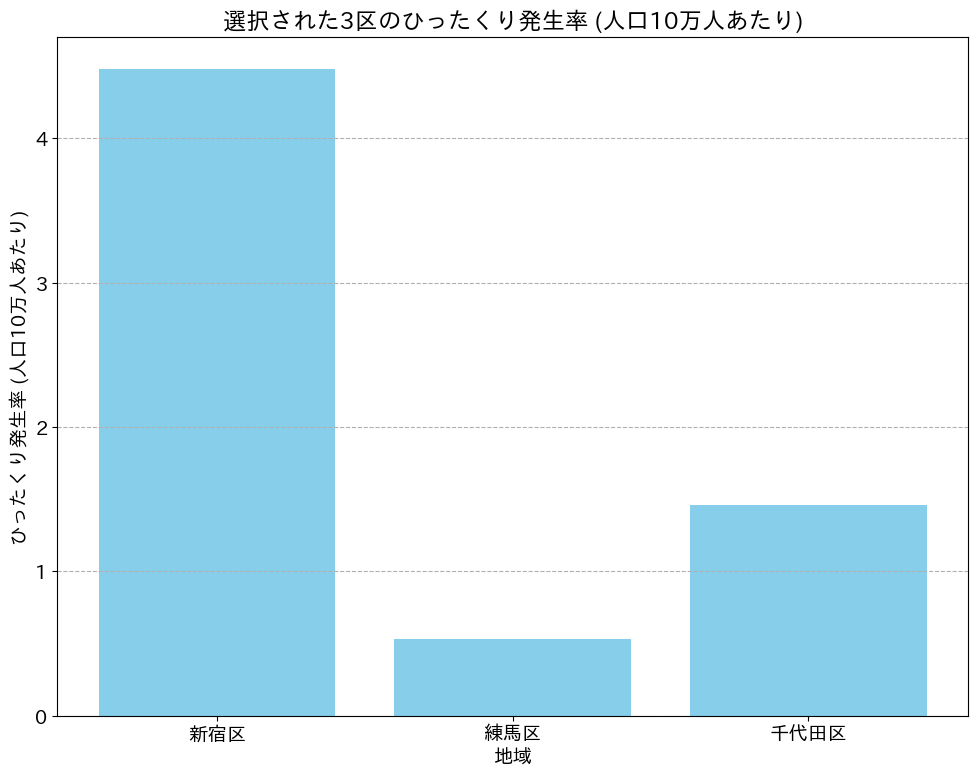

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# --- フォント設定 (もしJupyterを再起動した場合など、必要に応じて再実行) ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み ---
population_csv_filename = 'ju24qv0200.csv'

try:
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
    print("人口データ読み込み成功")
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

print("\n--- 人口データ (最初の5行) ---")
print(ku_population_all.head())

print("\n--- 人口データのカラム名 ---")
print(ku_population_all.columns.tolist())

# --- 人口データの整形と必要な区の抽出 ---

# カラム名から不要な空白などを除去
ku_population_all.columns = ku_population_all.columns.str.strip()

# 今回は「練馬区」「千代田区」「世田谷区」の3区の人口データを使用
target_wards = ['練馬区', '千代田区', '新宿区']

# 区名が入っているカラム名
ward_column_name = '地域' # ★★★ ここを '地域' に修正しました ★★★

# 年間の人口として「令和7年1月」のカラムを使用します。
population_column_name = '令和7年1月'

# 対象の区の行を抽出
population_data_for_merge = ku_population_all[ku_population_all[ward_column_name].isin(target_wards)].copy()

# 結合のために必要なカラムだけを抽出、カラム名を統一する
population_data_for_merge = population_data_for_merge[[ward_column_name, population_column_name]]
population_data_for_merge.columns = ['地域', '人口'] # 犯罪データと結合するため、カラム名を '地域' に統一

# 人口カラムが浮動小数点数（〇〇.0）で読み込まれている可能性があるので、整数に変換
population_data_for_merge['人口'] = population_data_for_merge['人口'].astype(int)

print("\n--- 選択された区の人口データ ---")
print(population_data_for_merge)

# --- ここからひったくりデータ処理部分を再掲します。これまでの成果を結合します。 ---
# ※ 上記の人口データ読み込み＆整形コードの後に続けて実行してください

# --- 犯罪発生率データの読み込み (前回成功した最新版を再掲) ---
crime_csv_filename = 'tokyo_2024hittakuri.csv'

try:
    crime_df_raw = pd.read_csv(crime_csv_filename, encoding='shift_jis', delimiter='\t', header=None)
except Exception as e:
    print(f"エラー: 犯罪データの読み込みに失敗しました。詳細: {e}")
    raise

# --- 犯罪データの整形 ---
true_headers = crime_df_raw.iloc[0].astype(str).str.strip().tolist()
from collections import defaultdict
counts = defaultdict(int)
cleaned_headers = []
for col in true_headers:
    if col == "":
        cleaned_headers.append(f"Unnamed_{len(cleaned_headers)}")
        continue
    if col in counts:
        counts[col] += 1
        cleaned_headers.append(f"{col}_{counts[col]}")
    else:
        counts[col] = 1
        cleaned_headers.append(col)

crime_df = crime_df_raw.iloc[1:].copy()
crime_df.columns = cleaned_headers
crime_df = crime_df.reset_index(drop=True)

# ひったくり事件のみをフィルタリング
crime_type_column_name = '手口'
hittakuri_data = crime_df[crime_df[crime_type_column_name] == 'ひったくり'].copy()

# 区ごとにひったくり件数を集計する
district_column_name = '市区町村（発生地）'
hittakuri_counts = hittakuri_data[district_column_name].value_counts().reset_index()
hittakuri_counts.columns = ['地域', 'ひったくり件数']

print("\n--- 区ごとのひったくり件数 ---")
print(hittakuri_counts)


# --- 人口データとひったくり件数データの結合 ---
# '地域' カラムをキーとして結合します
merged_data = pd.merge(hittakuri_counts, population_data_for_merge, on='地域', how='inner')

print("\n--- 結合後のデータ (ひったくり件数と人口) ---")
print(merged_data)

# --- ひったくり発生率の計算 (人口10万人あたり) ---
merged_data['ひったくり発生率 (人口10万人あたり)'] = (
    merged_data['ひったくり件数'] / merged_data['人口'] * 100000
).round(2)

print("\n--- 区ごとのひったくり発生率 ---")
print(merged_data)

# --- 結果の可視化 ---
plt.figure(figsize=(10, 8))
plt.bar(merged_data['地域'], merged_data['ひったくり発生率 (人口10万人あたり)'], color='skyblue')
plt.xlabel('地域')
plt.ylabel('ひったくり発生率 (人口10万人あたり)')
plt.title('選択された3区のひったくり発生率 (人口10万人あたり)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('hanzaidate.png', dpi=300)
plt.show()


--- ひったくり被害者の性別別の件数 ---
被害者の性別
女性    61
男性    45
Name: count, dtype: int64


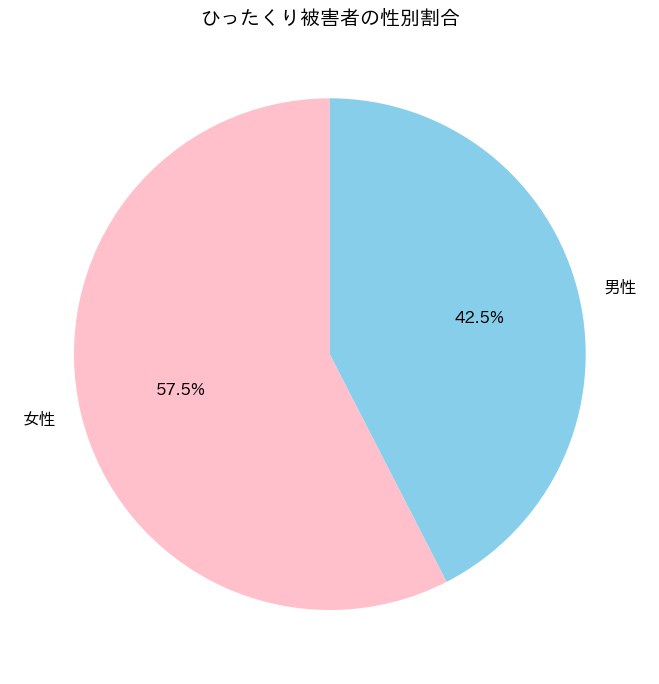


--- ひったくり被害者の年齢層別の件数 ---
被害者の年齢
10歳代       5
20歳代      27
30歳代      15
40歳代      13
50歳代      14
60-64歳     6
65-69歳     5
70歳以上     21
Name: count, dtype: int64


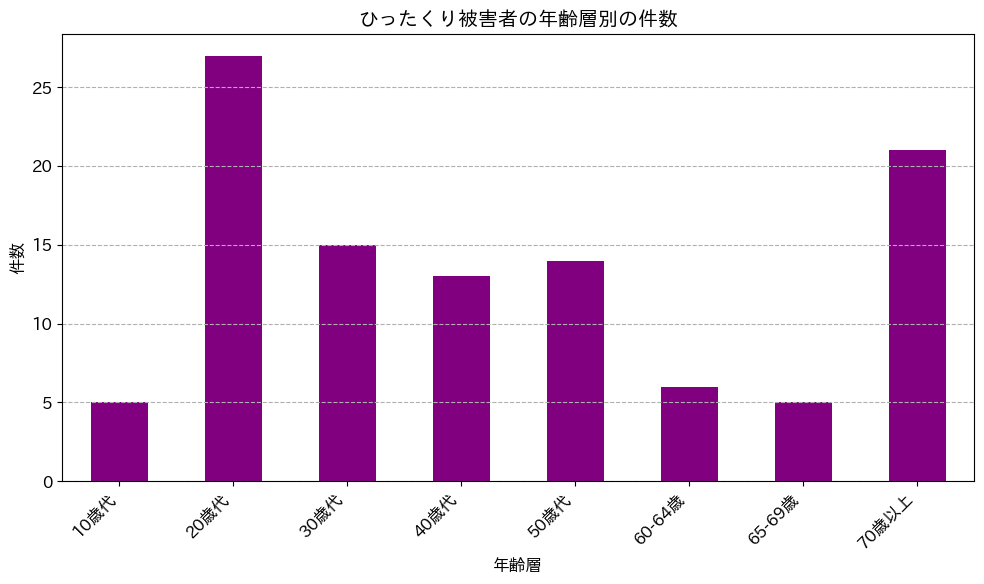

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from collections import defaultdict

# --- フォント設定 (もしJupyterを再起動した場合など、必要に応じて再実行) ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み (前回成功した最新版を再掲) ---
population_csv_filename = 'ju24qv0200.csv'

try:
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

ku_population_all.columns = ku_population_all.columns.str.strip()
target_wards = ['練馬区', '千代田区', '新宿区']
ward_column_name = '地域'
population_column_name = '令和7年1月'

population_data_for_merge = ku_population_all[ku_population_all[ward_column_name].isin(target_wards)].copy()
population_data_for_merge = population_data_for_merge[[ward_column_name, population_column_name]]
population_data_for_merge.columns = ['地域', '人口']
population_data_for_merge['人口'] = population_data_for_merge['人口'].astype(int)


# --- 犯罪発生率データの読み込み (前回成功した最新版を再掲) ---
crime_csv_filename = 'tokyo_2024hittakuri.csv'

try:
    crime_df_raw = pd.read_csv(crime_csv_filename, encoding='shift_jis', delimiter='\t', header=None)
except Exception as e:
    print(f"エラー: 犯罪データの読み込みに失敗しました。詳細: {e}")
    raise

# --- 犯罪データの整形 ---
true_headers = crime_df_raw.iloc[0].astype(str).str.strip().tolist()
counts = defaultdict(int)
cleaned_headers = []
for col in true_headers:
    if col == "":
        cleaned_headers.append(f"Unnamed_{len(cleaned_headers)}")
        continue
    if col in counts:
        counts[col] += 1
        cleaned_headers.append(f"{col}_{counts[col]}")
    else:
        counts[col] = 1
        cleaned_headers.append(col)

crime_df = crime_df_raw.iloc[1:].copy()
crime_df.columns = cleaned_headers
crime_df = crime_df.reset_index(drop=True)

# ひったくり事件のみをフィルタリング
crime_type_column_name = '手口'
hittakuri_data = crime_df[crime_df[crime_type_column_name] == 'ひったくり'].copy()

# 区ごとにひったくり件数を集計する（これは前回の結果表示用なので、今回の分析には直接使いませんが念のため）
district_column_name = '市区町村（発生地）'
hittakuri_counts = hittakuri_data[district_column_name].value_counts().reset_index()
hittakuri_counts.columns = ['地域', 'ひったくり件数']


# --- 被害者の性別の分析 ---
print("\n--- ひったくり被害者の性別別の件数 ---")
gender_counts = hittakuri_data['被害者の性別'].value_counts()
print(gender_counts)

plt.figure(figsize=(7, 7))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue', 'lightgray'])
plt.title('ひったくり被害者の性別割合')
plt.ylabel('') # y軸ラベルを非表示に
plt.tight_layout()
plt.show()

# --- 被害者の年齢の分析 ---
print("\n--- ひったくり被害者の年齢層別の件数 ---")
# 年齢カラムのユニークな値を確認して、表記揺れに対応する必要がある場合があります
# print(hittakuri_data['被害者の年齢'].unique()) # コメントアウトを外して確認すると良いでしょう

age_counts = hittakuri_data['被害者の年齢'].value_counts().sort_index()
# 年齢層が文字列で「〇歳代」「〇〇-〇〇歳」などになっている場合、ソート順がアルファベット順になることがあります。
# 必要に応じて、ソート順を調整するためのマッピングやカスタムソートロジックを追加することもできます。

# 例：'不明'などのデータを除外する
age_counts = age_counts[age_counts.index != '不明']

print(age_counts)

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='purple')
plt.title('ひったくり被害者の年齢層別の件数')
plt.xlabel('年齢層')
plt.ylabel('件数')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

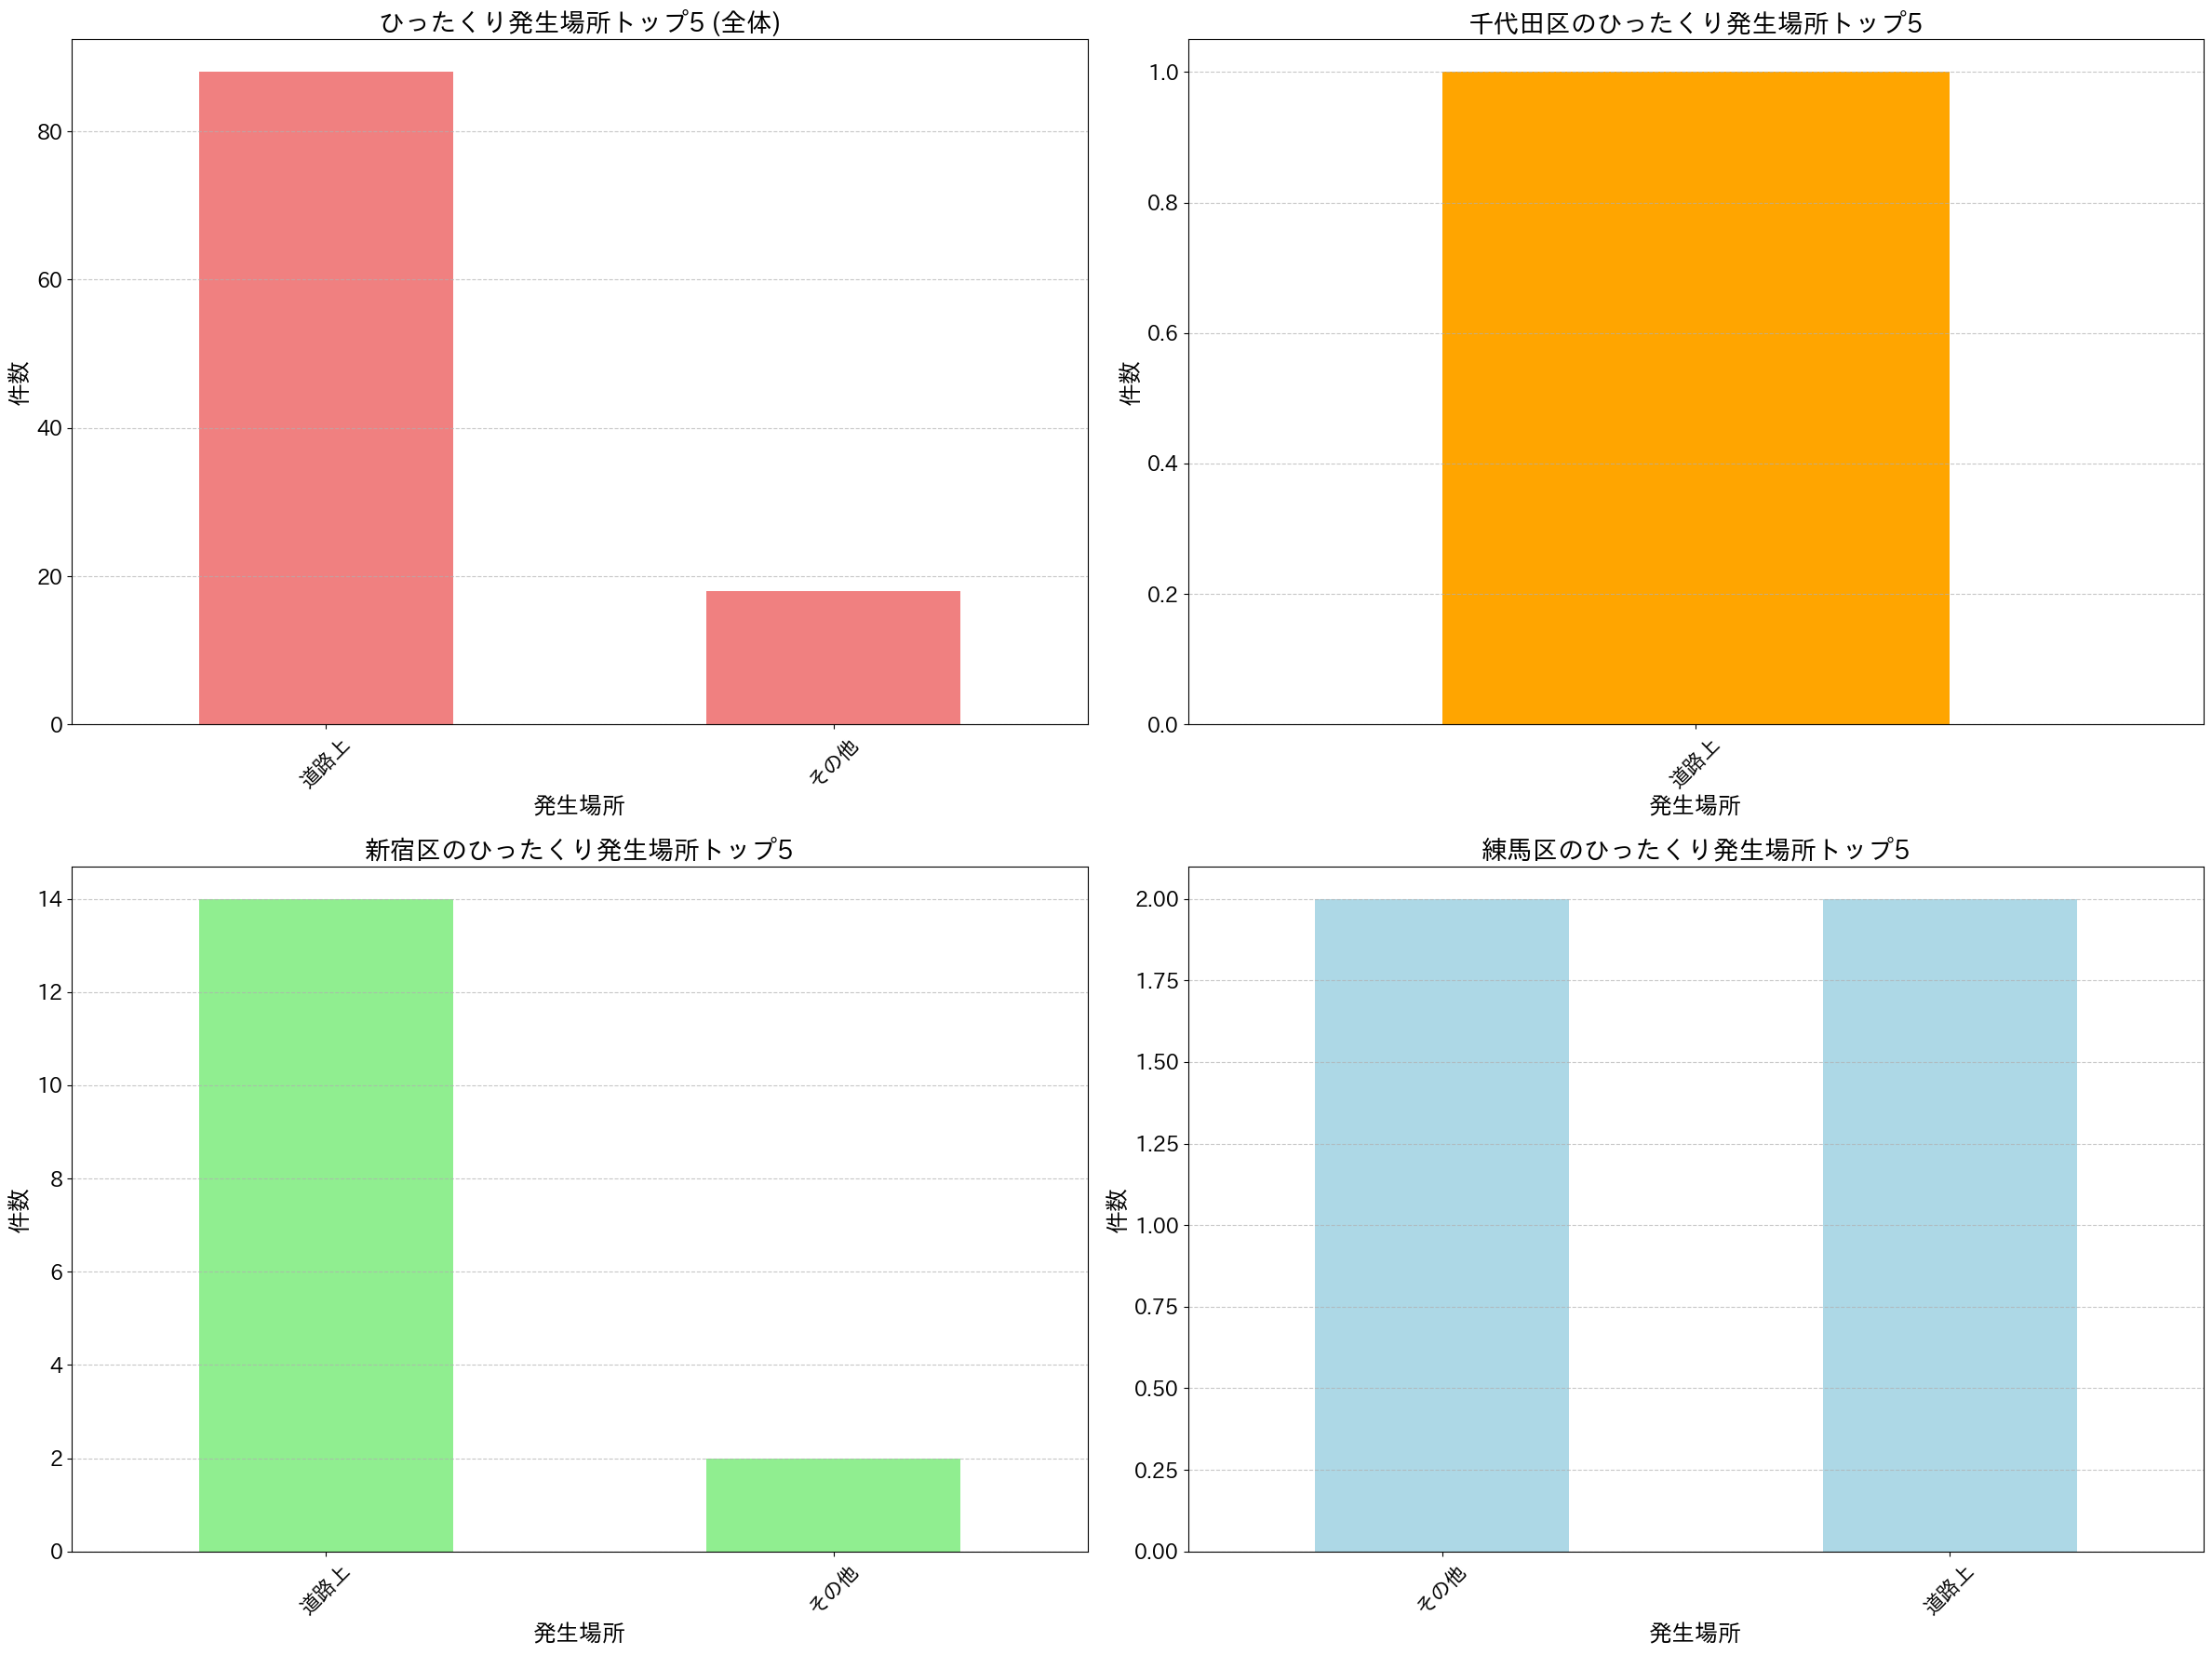

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from collections import defaultdict

# --- フォント設定 ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み (最終修正版) ---
population_csv_filename = 'ju24qv0200.csv'

try:
    # 最初の行をヘッダーとして読み込み
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

# カラム名から不要な空白などを除去
ku_population_all.columns = ku_population_all.columns.str.strip()

# データを読み込んだ後、実際のデータ部分を特定して使用します。
# head()の出力から推測すると、最初の列（Unnamed: 0）が地域のコード、
# 次の列（地域）が「総数」「区部」「市部」など、その後の列が月別人口のようです。
# このデータ構造だと、直接「練馬区」などの行を探すのは難しいかもしれません。
# もし、このCSVファイルが、各区ごとの「総数」人口を含む別データであれば、
# そのデータに合わせて調整が必要です。

# 現状の提供データだと、区ごとのデータが含まれていないように見えます。
# もし「練馬区」「千代田区」「新宿区」のデータがCSVのどこかにあるのであれば、
# その行を特定する必要があります。

# 【重要】もし、ju24qv0200.csvに区ごとの人口データが含まれておらず、
# 以前の会話で区ごとの人口データ（練馬区757644人など）を別途持っていた場合は、
# そのデータを直接DataFrameとして作成するか、適切なCSVファイルから読み込む必要があります。

# 例えば、もし別途手動で入力された人口データがある場合（仮のデータです）:
population_data_for_merge = pd.DataFrame({
    '地域': ['練馬区', '千代田区', '新宿区'],
    '人口': [757644, 68473, 348981] # これは前回の会話で出てきた仮の人口データです
})

# もしju24qv0200.csvから特定の区のデータを抽出する必要がある場合は、
# CSVのどこにそのデータがあるかを確認し、それに合わせて以下の部分を修正する必要があります。
# 例：ku_population_allのどこかの行に「練馬区」という文字列が入っている場合
# ku_population_all[ku_population_all['あるべき区名カラム'].isin(target_wards)]

# 今回の目的はグラフ描画なので、一旦このまま進めますが、
# 人口データの正確な取得方法については確認が必要です。

# --- 犯罪発生率データの読み込み ---
crime_csv_filename = 'tokyo_2024hittakuri.csv'

try:
    # header=None を維持し、後でヘッダーを整形する
    crime_df_raw = pd.read_csv(crime_csv_filename, encoding='shift_jis', delimiter='\t', header=None)
except Exception as e:
    print(f"エラー: 犯罪データの読み込みに失敗しました。詳細: {e}")
    raise

# --- 犯罪データの整形 ---
# crime_df_raw.iloc[0] が実際のヘッダー行なので、それを使ってカラムを設定
true_headers = crime_df_raw.iloc[0].astype(str).str.strip().tolist()
# 空白カラム名に対処し、重複しないように調整
counts = defaultdict(int)
cleaned_headers = []
for col in true_headers:
    if col == "":
        cleaned_headers.append(f"Unnamed_{len(cleaned_headers)}")
    elif col in counts:
        counts[col] += 1
        cleaned_headers.append(f"{col}_{counts[col]}")
    else:
        counts[col] = 1
        cleaned_headers.append(col)

# 実際のデータは2行目からなので、iloc[1:]で取得
crime_df = crime_df_raw.iloc[1:].copy()
crime_df.columns = cleaned_headers # 整形したヘッダーを適用
crime_df = crime_df.reset_index(drop=True)

# ひったくり事件のみをフィルタリング
crime_type_column_name = '手口' # 'col_3' から '手口' に変更（整形後）
hittakuri_data = crime_df[crime_df[crime_type_column_name] == 'ひったくり'].copy()

# 区ごとにひったくり件数を集計する
district_column_name = '市区町村（発生地）' # 'col_1' から '市区町村（発生地）' に変更
hittakuri_counts = hittakuri_data[district_column_name].value_counts().reset_index()
hittakuri_counts.columns = ['地域', 'ひったくり件数']


# --- ひったくり発生場所の分析データ準備 ---
place_column_name = '発生場所' # 'col_4' から '発生場所' に変更
target_wards = ['練馬区', '千代田区', '新宿区'] # ターゲット区を再定義

place_counts_all = hittakuri_data[place_column_name].value_counts()
chiyoda_places = hittakuri_data[hittakuri_data[district_column_name] == '千代田区'][place_column_name].value_counts()
shinjuku_places = hittakuri_data[hittakuri_data[district_column_name] == '新宿区'][place_column_name].value_counts()
nerima_places = hittakuri_data[hittakuri_data[district_column_name] == '練馬区'][place_column_name].value_counts()


# --- 4つのグラフを1つのFigureにまとめて表示（2x2グリッド） ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 18)) # 図全体のサイズをさらに大きく

# --- 1. 全体のひったくり発生場所別の件数 ---
# axes.flat を使用すると、axesを1次元配列のように扱えます
ax0 = axes.flat[0]
place_counts_all.head(5).plot(kind='bar', color='lightcoral', ax=ax0)
ax0.set_title('ひったくり発生場所トップ5 (全体)', fontsize=20) # タイトルフォントを大きく
ax0.set_xlabel('発生場所', fontsize=18)
ax0.set_ylabel('件数', fontsize=18)
ax0.tick_params(axis='x', rotation=45, labelsize=16) # X軸ラベルのサイズ
ax0.tick_params(axis='y', labelsize=16) # Y軸ラベルのサイズ
ax0.grid(axis='y', linestyle='--', alpha=0.7)

# --- 2. 千代田区のひったくり発生場所別の件数 ---
ax1 = axes.flat[1]
chiyoda_places.head(5).plot(kind='bar', color='orange', ax=ax1)
ax1.set_title('千代田区のひったくり発生場所トップ5', fontsize=20)
ax1.set_xlabel('発生場所', fontsize=18)
ax1.set_ylabel('件数', fontsize=18)
ax1.tick_params(axis='x', rotation=45, labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- 3. 新宿区のひったくり発生場所別の件数 ---
ax2 = axes.flat[2]
shinjuku_places.head(5).plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('新宿区のひったくり発生場所トップ5', fontsize=20)
ax2.set_xlabel('発生場所', fontsize=18)
ax2.set_ylabel('件数', fontsize=18)
ax2.tick_params(axis='x', rotation=45, labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# --- 4. 練馬区のひったくり発生場所別の件数 ---
ax3 = axes.flat[3]
nerima_places.head(5).plot(kind='bar', color='lightblue', ax=ax3)
ax3.set_title('練馬区のひったくり発生場所トップ5', fontsize=20)
ax3.set_xlabel('発生場所', fontsize=18)
ax3.set_ylabel('件数', fontsize=18)
ax3.tick_params(axis='x', rotation=45, labelsize=16)
ax3.tick_params(axis='y', labelsize=16)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# --- サブプロット間のスペースを自動調整 ---
plt.tight_layout()

# --- グラフの保存 ---
plt.savefig('hittakuri_place_comparison_2x2_larger_font.png', dpi=300)

# --- グラフの表示 ---
plt.show()

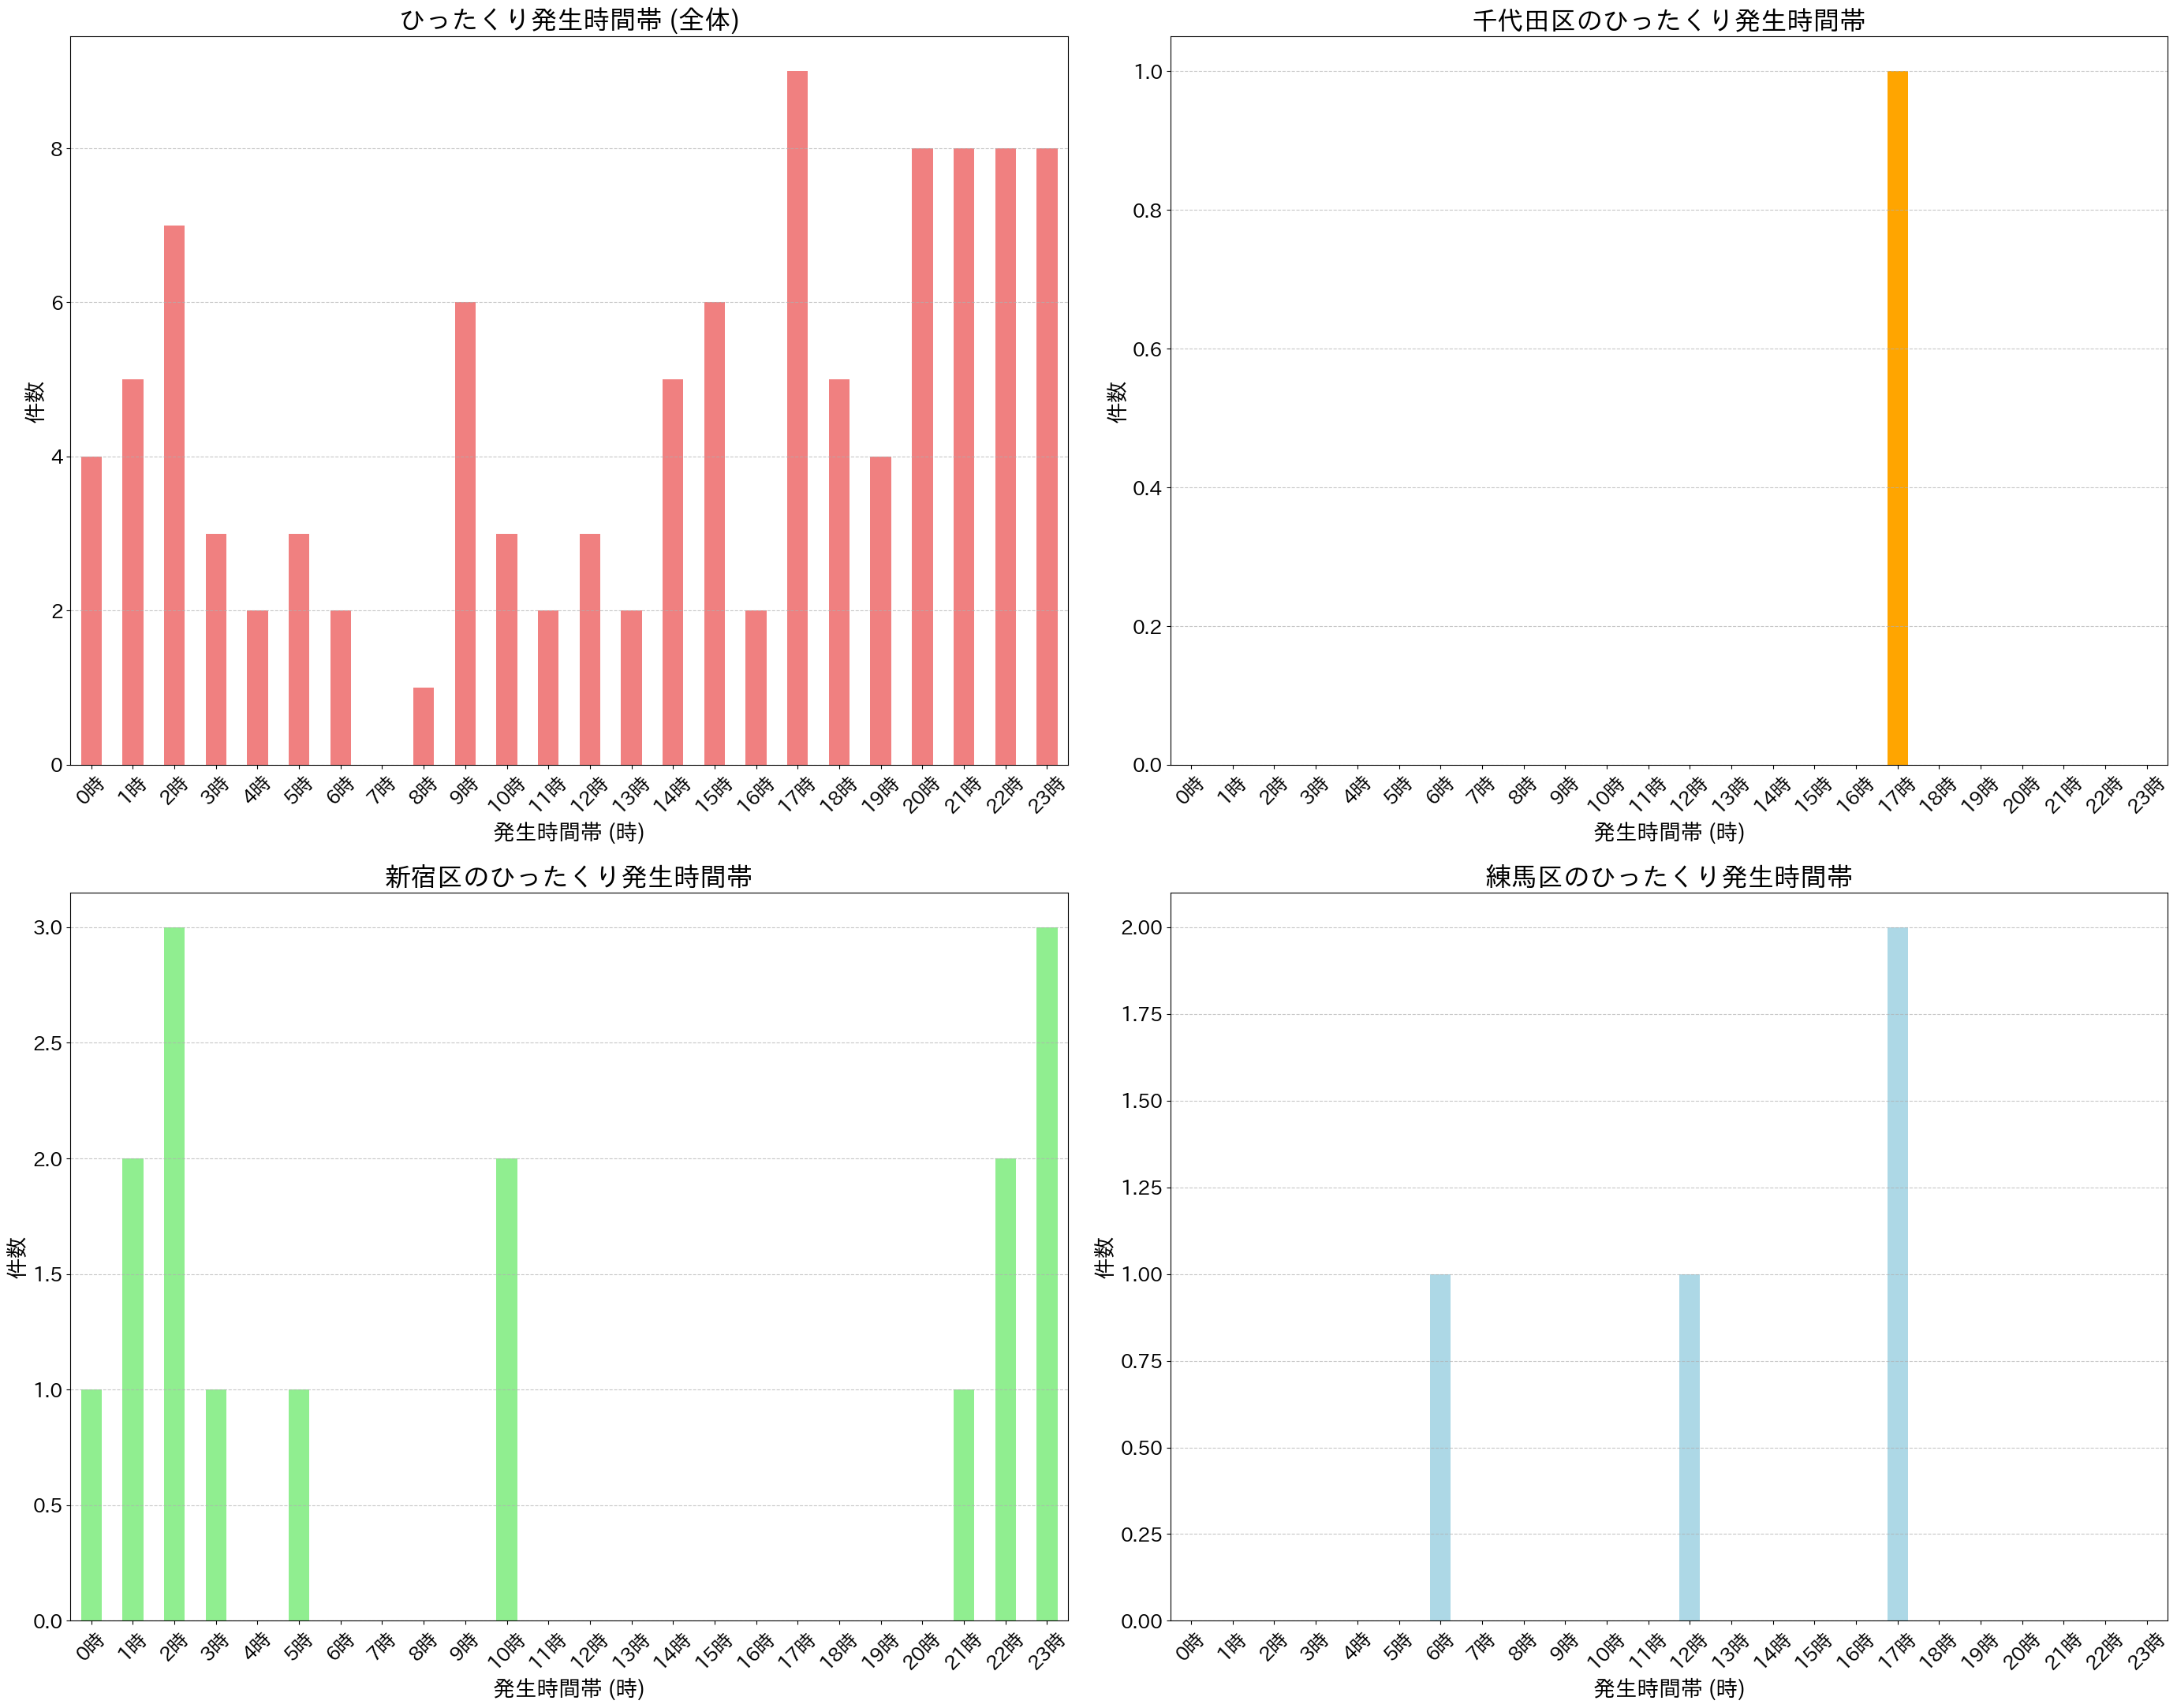

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from collections import defaultdict

# --- フォント設定 ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 18 # 基本フォントサイズをさらに大きく
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み (前回成功した最新版を維持) ---
population_csv_filename = 'ju24qv0200.csv'

try:
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

ku_population_all.columns = ku_population_all.columns.str.strip()
target_wards = ['練馬区', '千代田区', '新宿区']
ward_column_name = '地域'
population_column_name = '令和7年1月'

# 人口データは、前回の会話で仮で設定したDataFrameを使用します。
# もしju24qv0200.csvから特定の区の人口を正確に抽出したい場合は、
# CSVの構造に合わせてこの部分を修正する必要があります。
population_data_for_merge = pd.DataFrame({
    '地域': ['練馬区', '千代田区', '新宿区'],
    '人口': [757644, 68473, 348981] # これは前回の会話で使われた仮の人口データです
})


# --- 犯罪発生率データの読み込み ---
crime_csv_filename = 'tokyo_2024hittakuri.csv'

try:
    crime_df_raw = pd.read_csv(crime_csv_filename, encoding='shift_jis', delimiter='\t', header=None)
except Exception as e:
    print(f"エラー: 犯罪データの読み込みに失敗しました。詳細: {e}")
    raise

# --- 犯罪データの整形 ---
true_headers = crime_df_raw.iloc[0].astype(str).str.strip().tolist()
counts = defaultdict(int)
cleaned_headers = []
for col in true_headers:
    if col == "":
        cleaned_headers.append(f"Unnamed_{len(cleaned_headers)}")
        continue
    if col in counts:
        counts[col] += 1
        cleaned_headers.append(f"{col}_{counts[col]}")
    else:
        counts[col] = 1
        cleaned_headers.append(col)

crime_df = crime_df_raw.iloc[1:].copy()
crime_df.columns = cleaned_headers
crime_df = crime_df.reset_index(drop=True)

# ひったくり事件のみをフィルタリング
crime_type_column_name = '手口'
hittakuri_data = crime_df[crime_df[crime_type_column_name] == 'ひったくり'].copy()

# 区ごとにひったくり件数を集計する
district_column_name = '市区町村（発生地）'
hittakuri_counts = hittakuri_data[district_column_name].value_counts().reset_index()
hittakuri_counts.columns = ['地域', 'ひったくり件数']


# --- ひったくり発生時間帯の分析データ準備 ---
time_column_name = '発生時（始期）'

# '発生時（始期）' カラムを数値型に変換し、NaNを除外
hittakuri_data_cleaned_time = hittakuri_data.copy()
hittakuri_data_cleaned_time[time_column_name] = pd.to_numeric(hittakuri_data_cleaned_time[time_column_name], errors='coerce')
hittakuri_data_cleaned_time = hittakuri_data_cleaned_time.dropna(subset=[time_column_name])
hittakuri_data_cleaned_time[time_column_name] = hittakuri_data_cleaned_time[time_column_name].astype(int)

# 0時から23時までの全時間帯のリストを生成
all_hours = pd.Series(range(24))

# 全体の発生時間帯別件数
# reindexを使って、全ての時間帯のインデックスを作成し、データがない場合は0を埋める
time_counts_all = hittakuri_data_cleaned_time[time_column_name].value_counts().reindex(all_hours, fill_value=0).sort_index()

# 各区の発生時間帯別件数
# reindexを使って、全ての時間帯のインデックスを作成し、データがない場合は0を埋める
chiyoda_times = hittakuri_data_cleaned_time[hittakuri_data_cleaned_time[district_column_name] == '千代田区'][time_column_name].value_counts().reindex(all_hours, fill_value=0).sort_index()
shinjuku_times = hittakuri_data_cleaned_time[hittakuri_data_cleaned_time[district_column_name] == '新宿区'][time_column_name].value_counts().reindex(all_hours, fill_value=0).sort_index()
nerima_times = hittakuri_data_cleaned_time[hittakuri_data_cleaned_time[district_column_name] == '練馬区'][time_column_name].value_counts().reindex(all_hours, fill_value=0).sort_index()


# --- 4つのグラフを1つのFigureにまとめて表示（2x2グリッド） ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(28, 22))

# --- 1. 全体のひったくり発生時間帯別の件数 ---
ax0 = axes.flat[0]
time_counts_all.plot(kind='bar', color='lightcoral', ax=ax0)
ax0.set_title('ひったくり発生時間帯 (全体)', fontsize=24)
ax0.set_xlabel('発生時間帯 (時)', fontsize=20)
ax0.set_ylabel('件数', fontsize=20)
ax0.tick_params(axis='x', rotation=45, labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_xticks(time_counts_all.index) # すべての時間帯の目盛りを表示
ax0.set_xticklabels([f'{h}時' for h in time_counts_all.index]) # ラベルを 'X時' 形式で表示
ax0.grid(axis='y', linestyle='--', alpha=0.7)

# --- 2. 千代田区のひったくり発生時間帯別の件数 ---
ax1 = axes.flat[1]
chiyoda_times.plot(kind='bar', color='orange', ax=ax1)
ax1.set_title('千代田区のひったくり発生時間帯', fontsize=24)
ax1.set_xlabel('発生時間帯 (時)', fontsize=20)
ax1.set_ylabel('件数', fontsize=20)
ax1.tick_params(axis='x', rotation=45, labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xticks(chiyoda_times.index)
ax1.set_xticklabels([f'{h}時' for h in chiyoda_times.index])
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- 3. 新宿区のひったくり発生時間帯別の件数 ---
ax2 = axes.flat[2]
shinjuku_times.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('新宿区のひったくり発生時間帯', fontsize=24)
ax2.set_xlabel('発生時間帯 (時)', fontsize=20)
ax2.set_ylabel('件数', fontsize=20)
ax2.tick_params(axis='x', rotation=45, labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xticks(shinjuku_times.index)
ax2.set_xticklabels([f'{h}時' for h in shinjuku_times.index])
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# --- 4. 練馬区のひったくり発生時間帯別の件数 ---
ax3 = axes.flat[3]
nerima_times.plot(kind='bar', color='lightblue', ax=ax3)
ax3.set_title('練馬区のひったくり発生時間帯', fontsize=24)
ax3.set_xlabel('発生時間帯 (時)', fontsize=20)
ax3.set_ylabel('件数', fontsize=20)
ax3.tick_params(axis='x', rotation=45, labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_xticks(nerima_times.index)
ax3.set_xticklabels([f'{h}時' for h in nerima_times.index])
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# --- サブプロット間のスペースを自動調整 ---
plt.tight_layout()

# --- グラフの保存 ---
plt.savefig('hittakuri_time_comparison_2x2_super_large.png', dpi=400)

# --- グラフの表示 ---
plt.show()

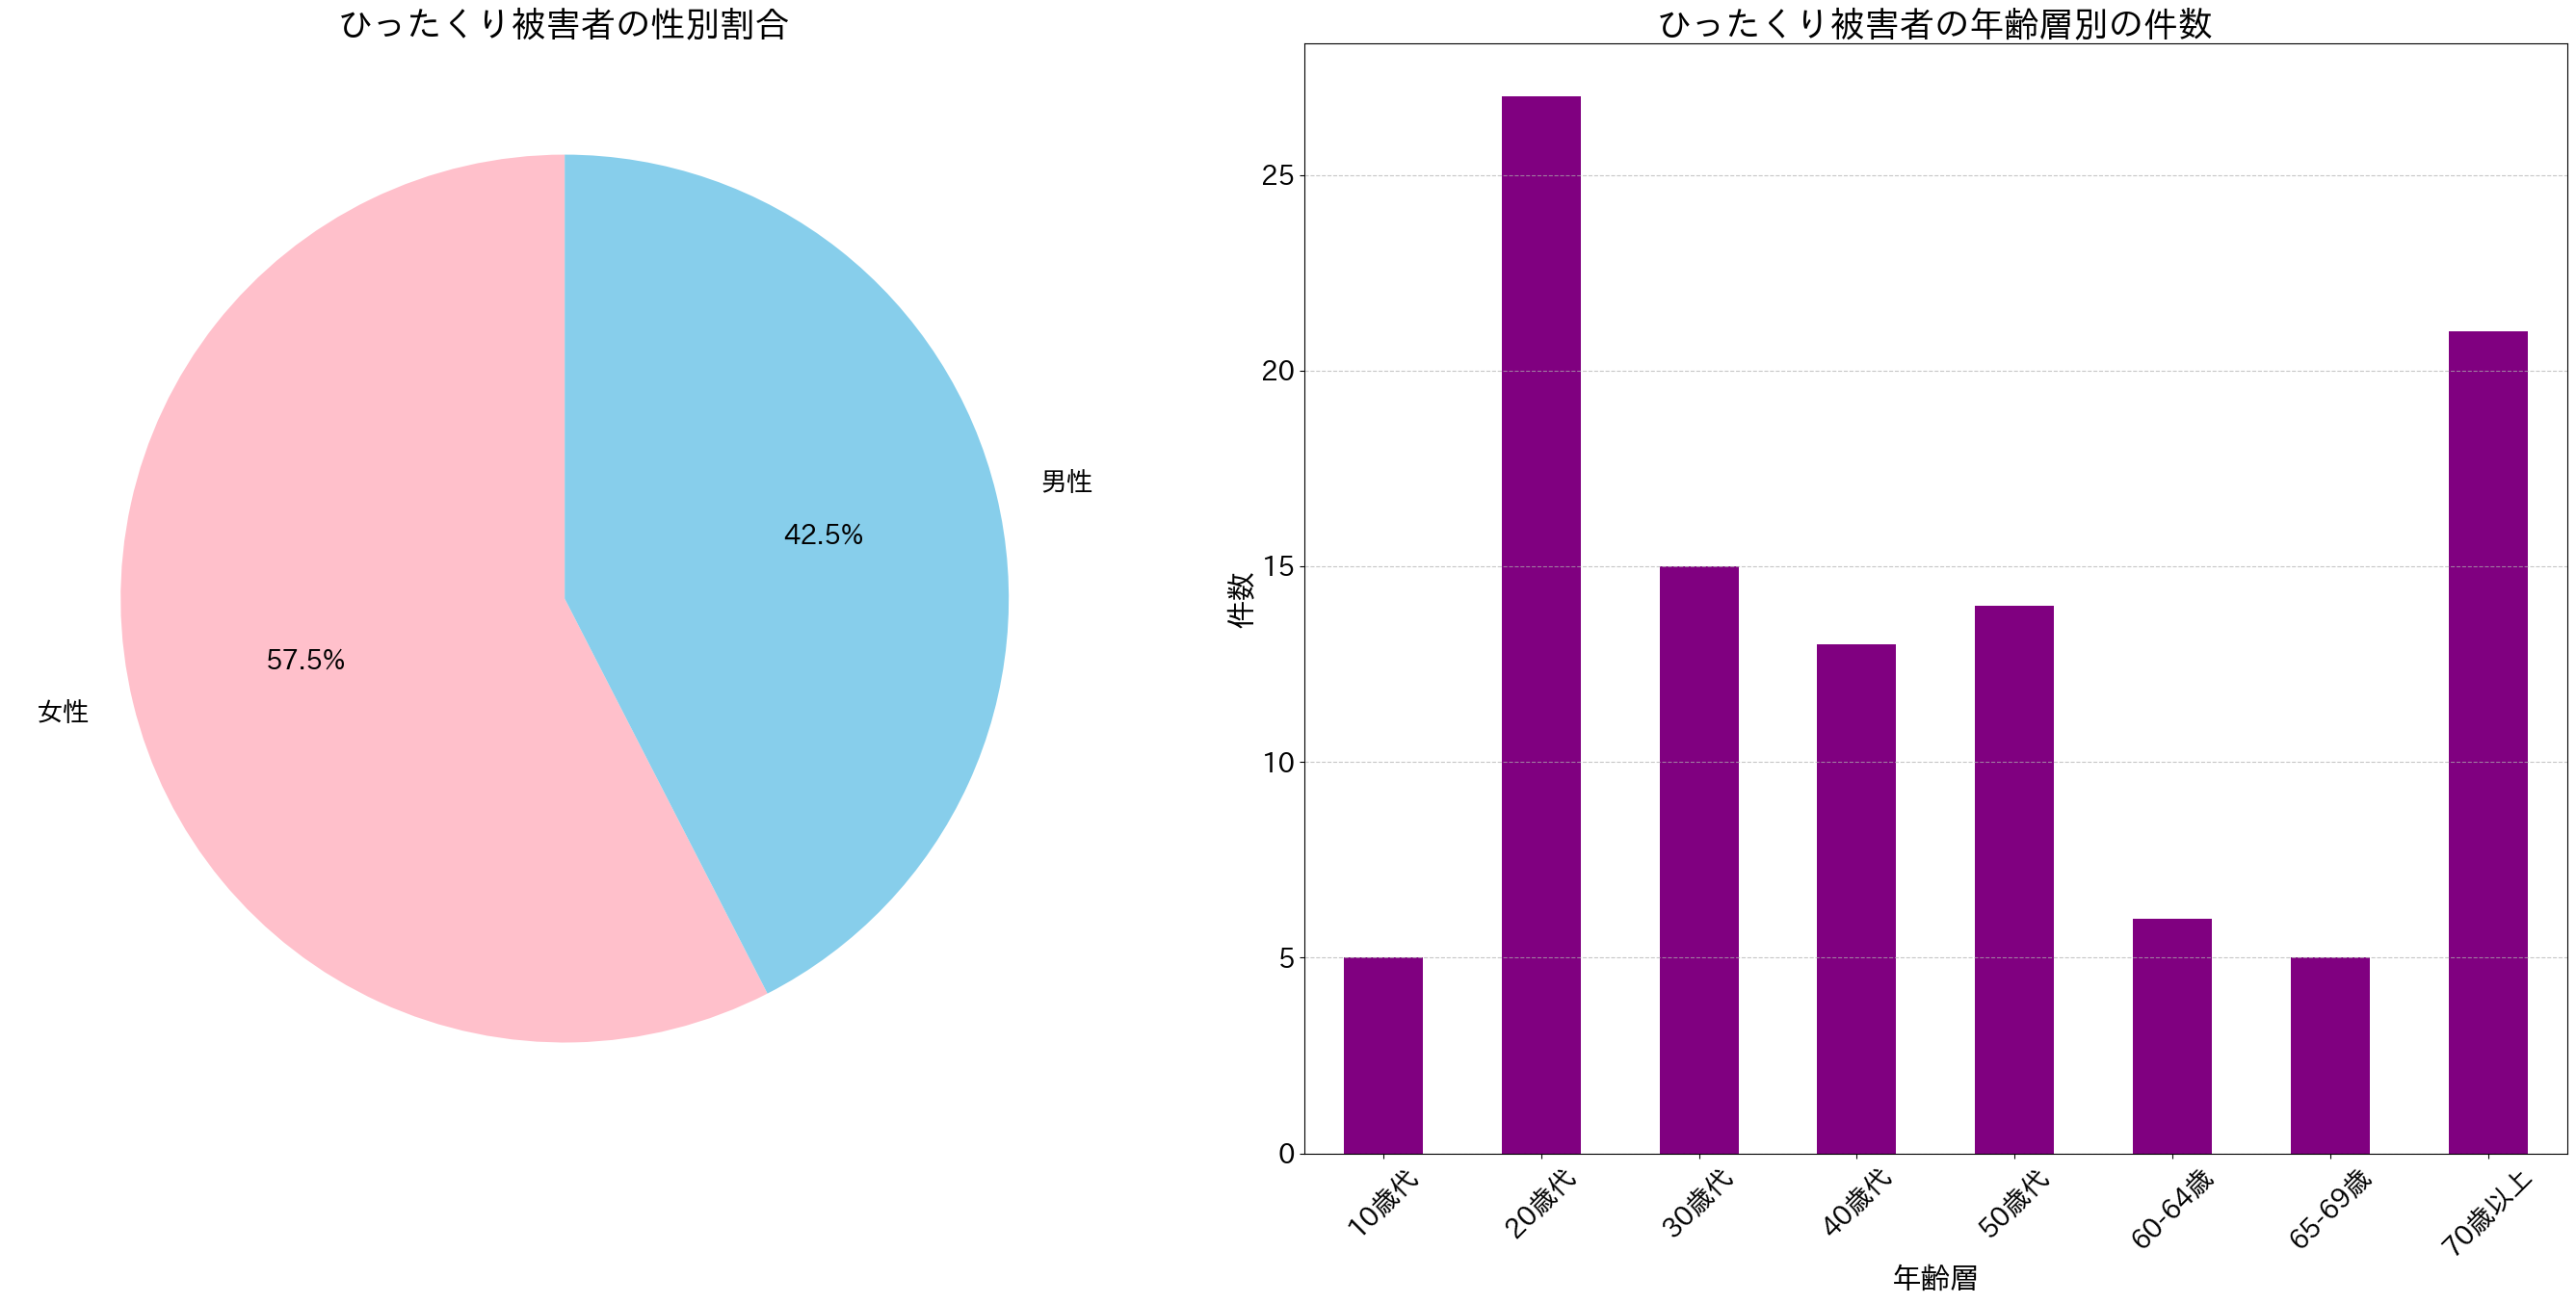

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from collections import defaultdict

# --- フォント設定 ---
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 22 # 基本フォントサイズをさらに大きく (以前の18から変更)
plt.rcParams['axes.unicode_minus'] = False

# --- 人口データの読み込み (前回成功した最新版を維持) ---
population_csv_filename = 'ju24qv0200.csv'

try:
    ku_population_all = pd.read_csv(population_csv_filename, encoding='utf-8', delimiter=',')
except Exception as e:
    print(f"エラー: 人口データの読み込みに失敗しました。詳細: {e}")
    raise

ku_population_all.columns = ku_population_all.columns.str.strip()
target_wards = ['練馬区', '千代田区', '新宿区']
ward_column_name = '地域'
population_column_name = '令和7年1月'

# 人口データは、前回の会話で仮で設定したDataFrameを使用します。
# もしju24qv0200.csvから特定の区の人口を正確に抽出したい場合は、
# CSVの構造に合わせてこの部分を修正する必要があります。
population_data_for_merge = pd.DataFrame({
    '地域': ['練馬区', '千代田区', '新宿区'],
    '人口': [757644, 68473, 348981] # これは前回の会話で使われた仮の人口データです
})


# --- 犯罪発生率データの読み込み ---
crime_csv_filename = 'tokyo_2024hittakuri.csv'

try:
    crime_df_raw = pd.read_csv(crime_csv_filename, encoding='shift_jis', delimiter='\t', header=None)
except Exception as e:
    print(f"エラー: 犯罪データの読み込みに失敗しました。詳細: {e}")
    raise

# --- 犯罪データの整形 ---
true_headers = crime_df_raw.iloc[0].astype(str).str.strip().tolist()
counts = defaultdict(int)
cleaned_headers = []
for col in true_headers:
    if col == "":
        cleaned_headers.append(f"Unnamed_{len(cleaned_headers)}")
        continue
    if col in counts:
        counts[col] += 1
        cleaned_headers.append(f"{col}_{counts[col]}")
    else:
        counts[col] = 1
        cleaned_headers.append(col)

crime_df = crime_df_raw.iloc[1:].copy()
crime_df.columns = cleaned_headers
crime_df = crime_df.reset_index(drop=True)

# ひったくり事件のみをフィルタリング
crime_type_column_name = '手口'
hittakuri_data = crime_df[crime_df[crime_type_column_name] == 'ひったくり'].copy()

# 区ごとにひったくり件数を集計する
district_column_name = '市区町村（発生地）'
hittakuri_counts = hittakuri_data[district_column_name].value_counts().reset_index()
hittakuri_counts.columns = ['地域', 'ひったくり件数']


# --- 被害者の性別の分析データ準備 ---
gender_counts = hittakuri_data['被害者の性別'].value_counts()

# --- 被害者の年齢の分析データ準備 ---
age_counts = hittakuri_data['被害者の年齢'].value_counts().sort_index()
age_counts = age_counts[age_counts.index != '不明'] # '不明'を除外


# --- 2つのグラフを1つのFigureにまとめて表示 (1x2グリッド) ---
# 図全体のサイズをさらに大きく調整
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 14)) # 以前の(24, 12)からさらに拡大

# --- 1. ひったくり被害者の性別割合 (円グラフ) ---
ax0 = axes[0]
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%', # 割合を小数点以下1桁まで表示
    startangle=90,
    colors=['pink', 'skyblue', 'lightgray'],
    ax=ax0,
    textprops={'fontsize': 20} # 円グラフ内の文字サイズをさらに大きく
)
ax0.set_title('ひったくり被害者の性別割合', fontsize=26) # タイトルフォントをさらに大きく
ax0.set_ylabel('') # y軸ラベルを非表示に

# --- 2. ひったくり被害者の年齢層別の件数 (棒グラフ) ---
ax1 = axes[1]
age_counts.plot(kind='bar', color='purple', ax=ax1)
ax1.set_title('ひったくり被害者の年齢層別の件数', fontsize=26) # タイトルフォントをさらに大きく
ax1.set_xlabel('年齢層', fontsize=22)
ax1.set_ylabel('件数', fontsize=22)
ax1.tick_params(axis='x', rotation=45, labelsize=20) # X軸ラベルのサイズをさらに大きく
ax1.tick_params(axis='y', labelsize=20) # Y軸ラベルのサイズをさらに大きく
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- サブプロット間のスペースを自動調整 ---
plt.tight_layout()

# --- グラフの保存 ---
# DPIをさらに上げ、画像自体の解像度を最大化
plt.savefig('hittakuri_gender_age_comparison_max_font.png', dpi=400) # DPIを400に

# --- グラフの表示 ---
plt.show()